In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os
from google.colab import drive

In [2]:
#Mounting the drive
drive.mount('/content/drive')
#Setting kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/.kaggle"

Mounted at /content/drive


In [3]:
#Downloading and unzip dataset
!kaggle datasets download -d moltean/fruits
!unzip \*.zip && rm *.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/124

In [4]:
train_dir= "/content/fruits-360_dataset/fruits-360/Training/"
test_dir = "/content/fruits-360_dataset/fruits-360/Test/"

In [6]:
fruits = []
fruits_image = []
for i in os.listdir(train_dir):
    for image_filename in os.listdir(train_dir + i):
        fruits.append(i) # name of the fruit 
        fruits_image.append(i + '/' + image_filename) # image of the fruit

train_fruits = pd.DataFrame(fruits, columns=["Fruits"])
train_fruits["Fruits Image"] = fruits_image       

In [7]:
from collections import Counter
newData = Counter(train_fruits["Fruits"])
most_fruits = newData.most_common(9)

print("The 9 most frequently found fruits in the data set and their number")
most_fruits

x,y = zip(*most_fruits)
x,y = list(x),list(y)

print("The 9 most frequently found fruits in the dataset -- > \n ", x)

The 9 most frequently found fruits in the data set and their number
The 9 most frequently found fruits in the dataset -- > 
  ['Grape Blue', 'Plum 3', 'Tomato 3', 'Cherry 2', 'Tomato 1', 'Cherry Rainier', 'Peach 2', 'Melon Piel de Sapo', 'Strawberry Wedge']


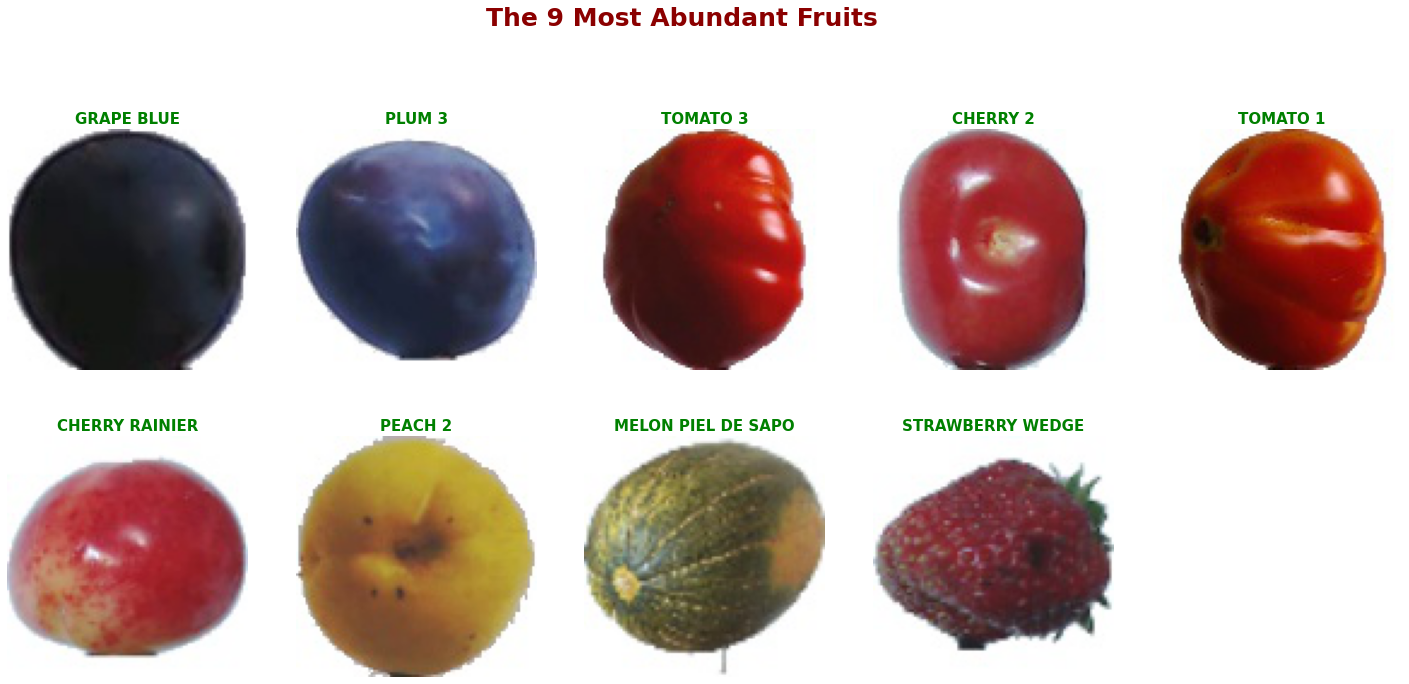

In [9]:
from tensorflow.keras.utils import load_img
plt.figure(figsize=(25,16))
how_many_fruits = len(x)

for i in range(how_many_fruits):
    fruits = train_fruits[train_fruits["Fruits"] == x[i]]["Fruits Image"].values [1]
    
    plt.subplot(3,5,i+1)
    img = load_img(train_dir + fruits)
    plt.imshow(img)
    plt.title(x[i].upper(), color = "green", fontsize = 15 , fontweight = 600)
    plt.axis("off")

plt.suptitle("The 9 Most Abundant Fruits", fontsize = 25 , color = "darkred", fontweight = 'bold')
plt.show()

In [10]:
np.random.seed(1234)
directory="/content/fruits-360_dataset/fruits-360/Training/"
classes=['Grape Blue', 'Plum 3', 'Tomato 1', 'Cherry 2', 'Tomato 3', 'Melon Piel de Sapo', 'Peach 2', 'Cherry Rainier', 'Strawberry Wedge']

all_arrays=[]
img_size=100
for i in classes:
    path=os.path.join(directory,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        #img_array=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        #img_array=cv2.resize(img_array,(img_size,img_size))
        all_arrays.append([img_array,class_num])

In [11]:
directory2="/content/fruits-360_dataset/fruits-360/Test/"
classes2=['Grape Blue', 'Plum 3', 'Tomato 1', 'Cherry 2', 'Tomato 3', 'Melon Piel de Sapo', 'Peach 2', 'Cherry Rainier', 'Strawberry Wedge']

all_arrays2=[]
img_size=100
for i in classes2:
    path=os.path.join(directory2,i)
    class_num2=classes.index(i)
    for img in os.listdir(path):
        #img_array2=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        #img_array2=cv2.resize(img_array2,(img_size,img_size))
        all_arrays2.append([img_array2,class_num2])

In [12]:
import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train) #arraying

import random
random.shuffle(all_arrays2)

X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test) #arraying

In [13]:
#normalization and reshaping
X_train=X_train.reshape(-1,img_size,img_size,3)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,3)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (7050, 100, 100, 3)
shape of X_test=   (2354, 100, 100, 3)


In [14]:
from tensorflow.keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=9)
Y_test=to_categorical(Y_test,num_classes=9)

In [15]:
Y_train.shape

(7050, 9)

In [16]:
X_train.shape

(7050, 100, 100, 3)

In [17]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [22]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam

from keras.callbacks import ReduceLROnPlateau


model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

model.summary()

epochs=10
batch_size=18

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 8)       224       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 8)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 50, 50, 8)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        2336      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 25, 25, 32)       

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
hist=model.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, validation_data=(x_val,y_val))

Epoch 1/10
314/314 [==============================] - 6s 17ms/step - loss: 0.5243 - accuracy: 0.8301 - val_loss: 0.0534 - val_accuracy: 0.9972
Epoch 2/10
314/314 [==============================] - 5s 15ms/step - loss: 0.0353 - accuracy: 0.9906 - val_loss: 0.0246 - val_accuracy: 0.9972
Epoch 3/10
314/314 [==============================] - 5s 15ms/step - loss: 0.0090 - accuracy: 0.9984 - val_loss: 0.0152 - val_accuracy: 0.9979
Epoch 4/10
314/314 [==============================] - 5s 15ms/step - loss: 0.0237 - accuracy: 0.9918 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 5/10
314/314 [==============================] - 5s 15ms/step - loss: 0.0105 - accuracy: 0.9970 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 6/10
314/314 [==============================] - 5s 15ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 7.7399e-04 - val_accuracy: 1.0000
Epoch 7/10
314/314 [==============================] - 5s 15ms/step - loss: 0.0131 - accuracy: 0.9961 - val_loss: 0.0625 - val_accuracy: 0.

In [24]:
model.evaluate(X_test,Y_test)

74/74 [==============================] - 1s 10ms/step - loss: 0.0023 - accuracy: 0.9996


[0.0023045081179589033, 0.9995751976966858]

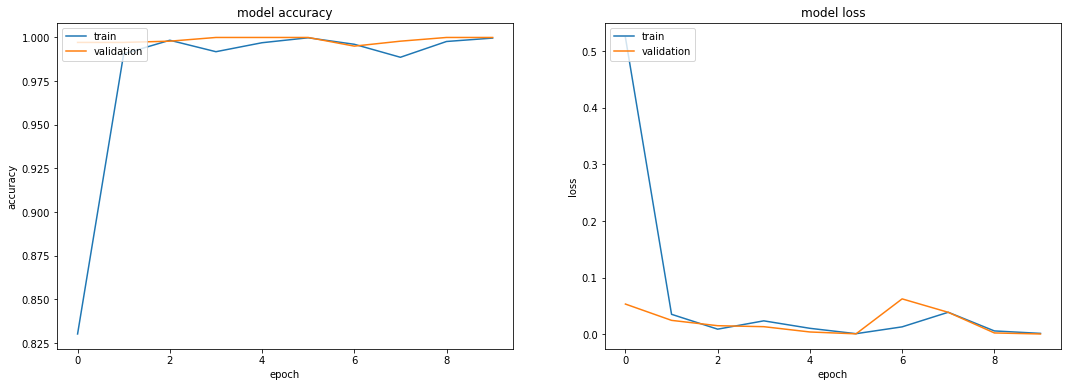

In [25]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(figsize=(18,6))
   
 # summarize history for accuracy  
   
plt.subplot(1, 2, 1)  
plt.plot(hist.history['accuracy'])  
plt.plot(hist.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(1, 2, 2)  
plt.plot(hist.history['loss'])  
plt.plot(hist.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

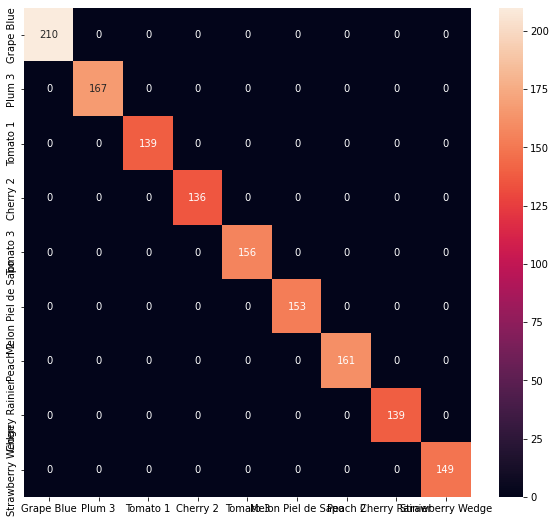

In [26]:
#val_data의 confusion matrix 
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=['Grape Blue', 'Plum 3', 'Tomato 1', 'Cherry 2', 'Tomato 3', 'Melon Piel de Sapo', 'Peach 2', 'Cherry Rainier', 'Strawberry Wedge']
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

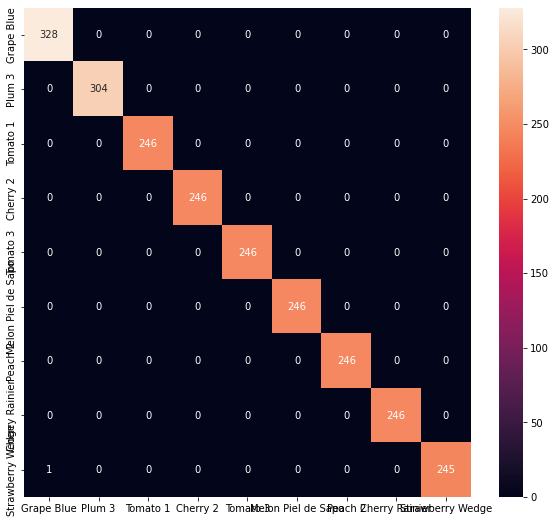

In [27]:
#test 의confusion matrix
y_pred2=model.predict(X_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(Y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()